In [1]:
#Import necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv('survey lung cancer.csv')
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
#display the first few rows of the dataset
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
#display the first few colums of the dataset
dataset.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
#Sanity check of data 
dataset.shape

(309, 16)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
#displaye the missing values count 
print("missing values count:")
print(dataset.isnull().sum())

missing values count:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [8]:
dataset.shape[0]

309

In [9]:
#chek the duplicates value
print("check the duplicate vales")
print(dataset.duplicated().sum())

check the duplicate vales
33


In [10]:
dataset.drop_duplicates(inplace=True)


In [11]:
#chek the duplicates value
print("check the duplicate vales")
print(dataset.duplicated().sum())

check the duplicate vales
0


In [12]:
#Identify the garbage value
for i in dataset.select_dtypes(include='object').columns:
    print(dataset[i].value_counts())
    print("****"*10)

GENDER
M    142
F    134
Name: count, dtype: int64
****************************************
LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64
****************************************


In [13]:
#this fun describe mumerical data
dataset.describe() # mean count SD

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [14]:
# this description for numerical value
dataset.describe().T# row convert col

,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
YELLOW_FINGERS,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
ANXIETY,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
PEER_PRESSURE,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
CHRONIC DISEASE,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
FATIGUE,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
ALLERGY,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
WHEEZING,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
ALCOHOL CONSUMING,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


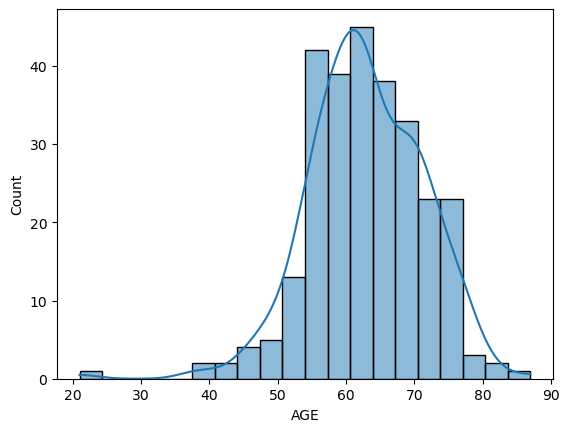

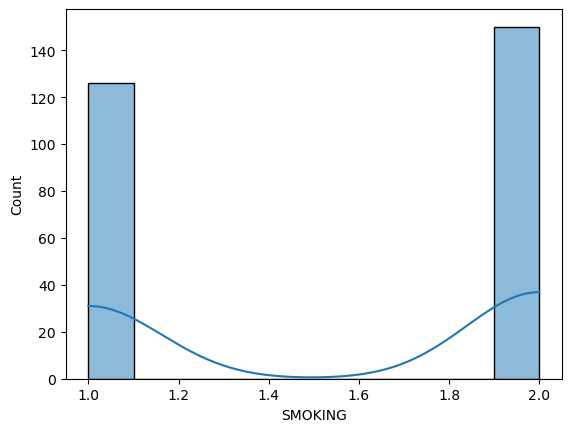

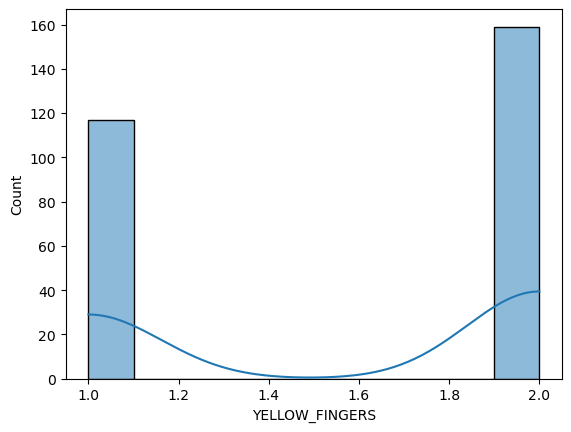

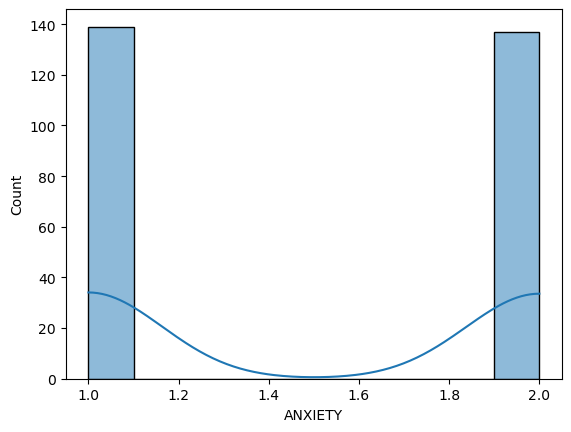

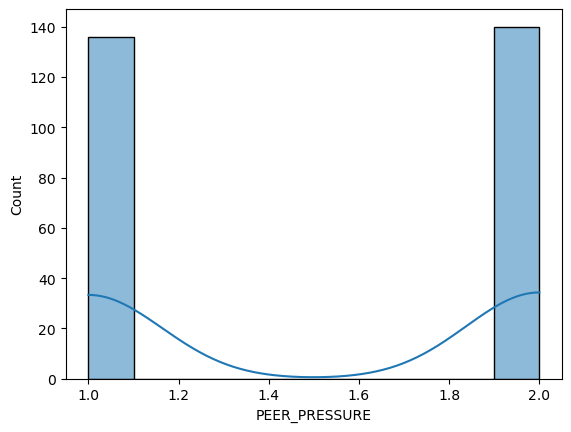

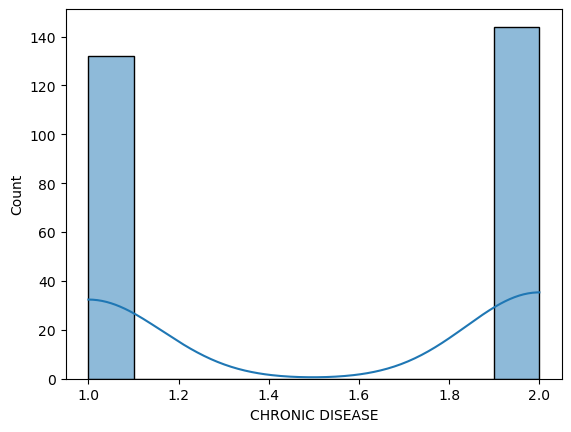

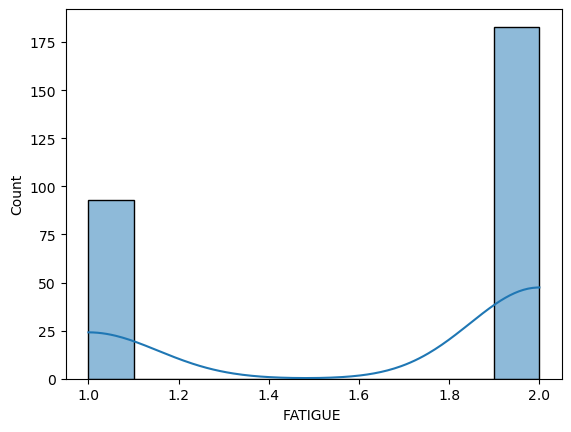

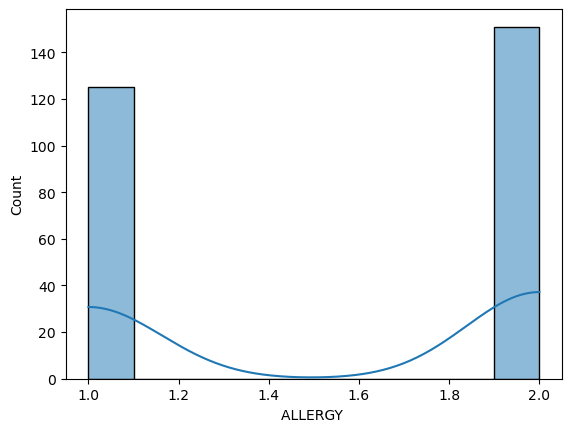

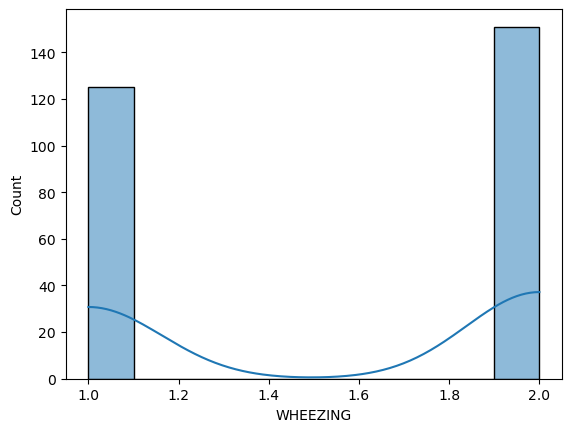

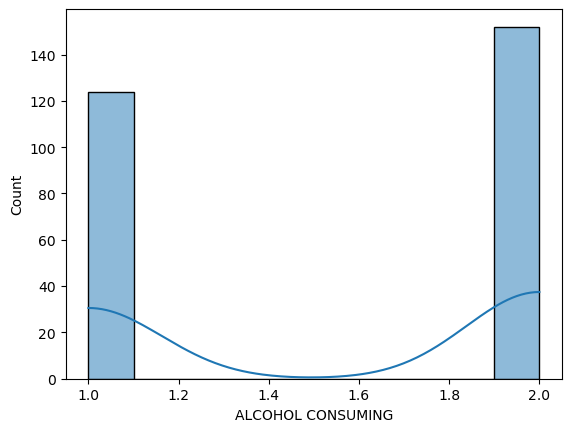

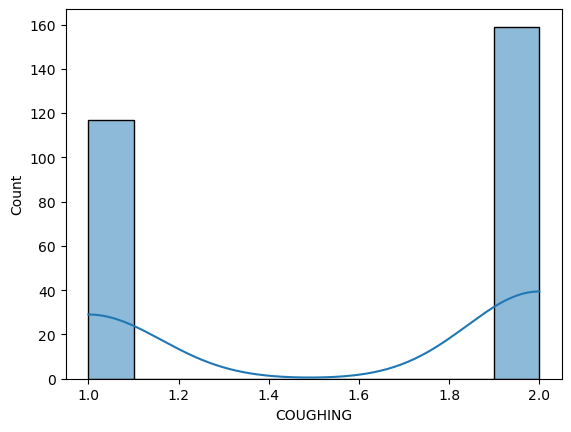

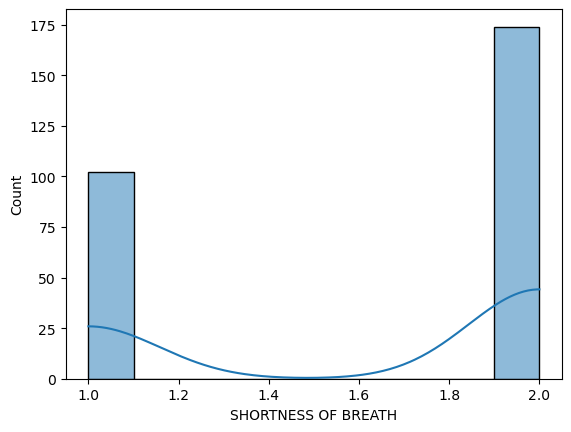

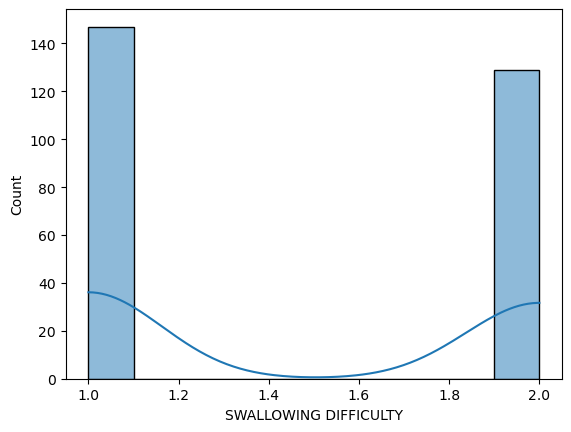

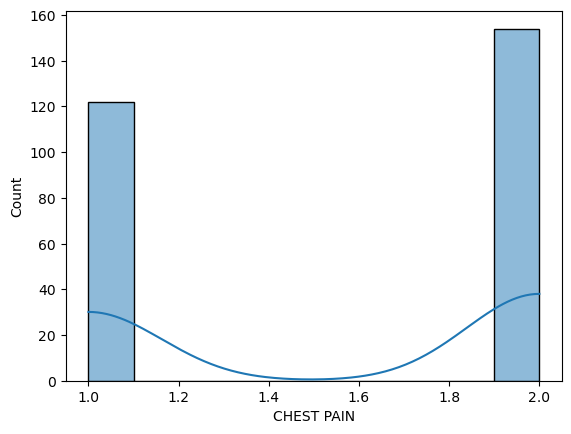

In [15]:
# check data distribution numerical(EDA)
import warnings
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.histplot(data=dataset,x=i,kde=True)
    plt.show()


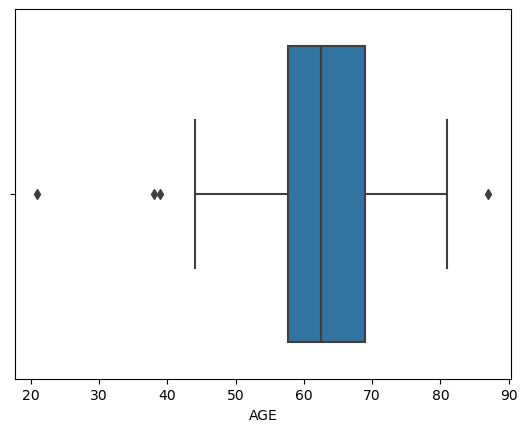

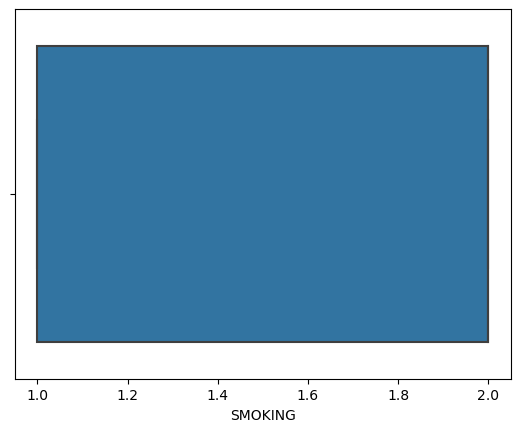

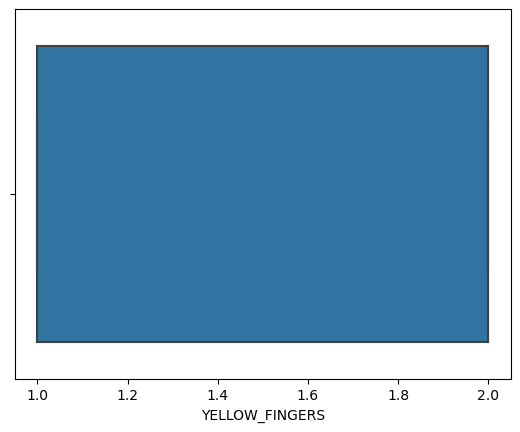

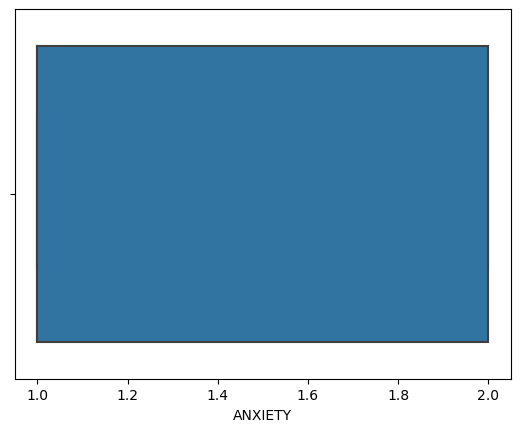

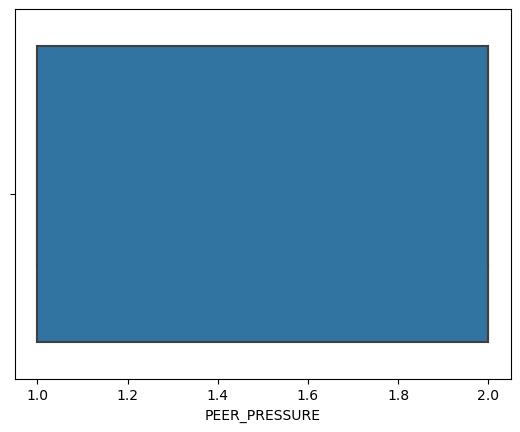

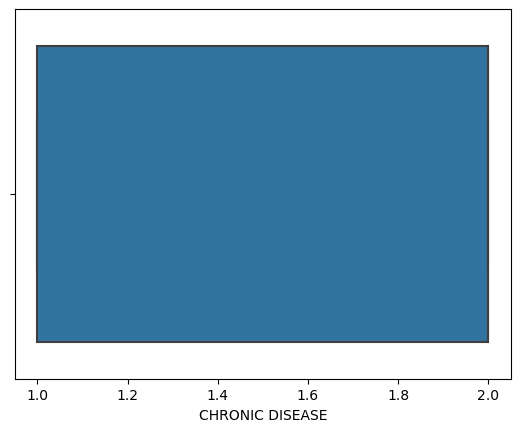

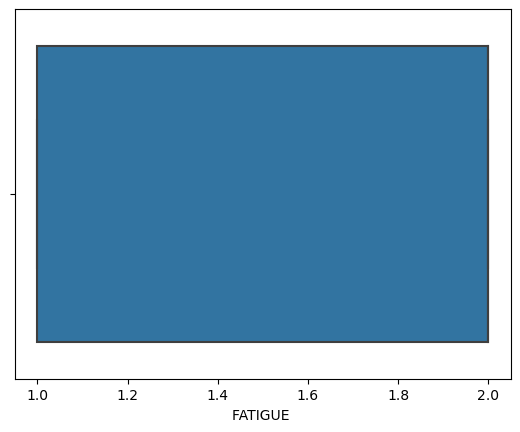

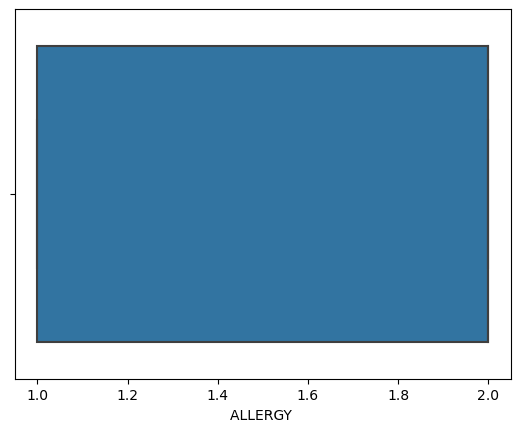

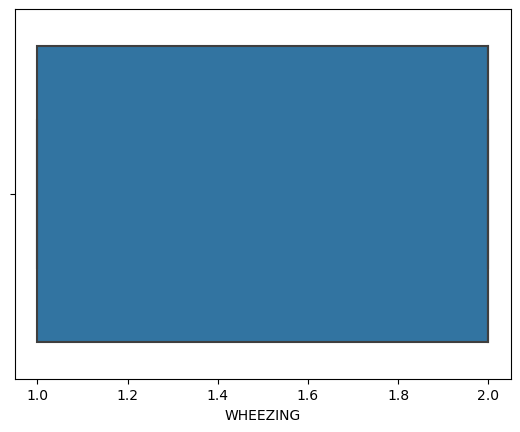

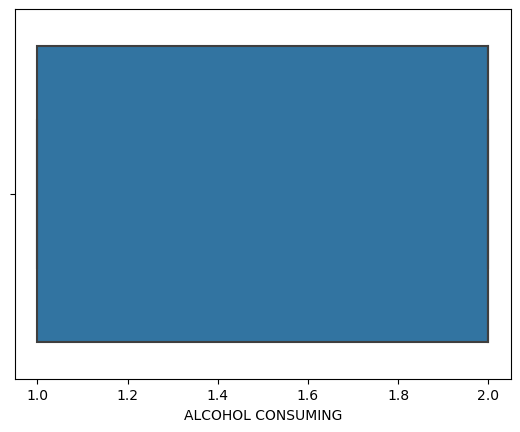

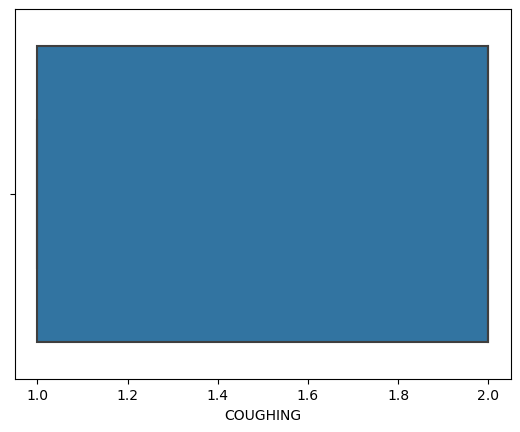

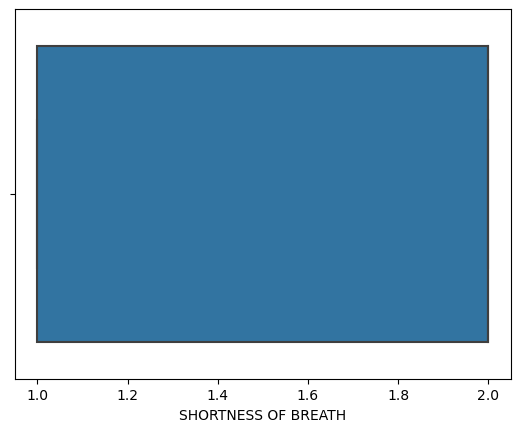

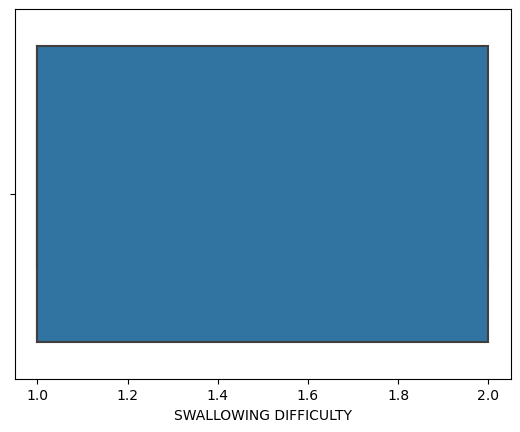

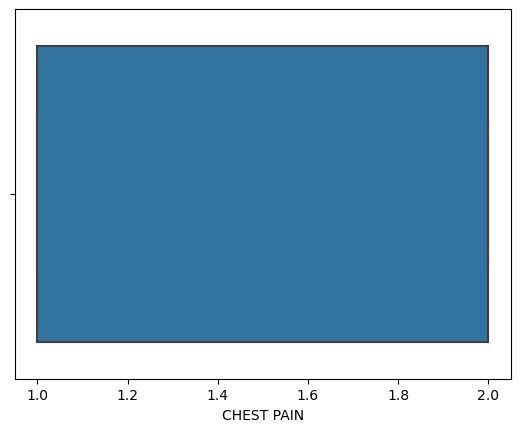

In [16]:
# Identifyer the outlier(numerical value)data visulization
import warnings
warnings.filterwarnings("ignore")
for i in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset,x=i)
    plt.show()


In [17]:
# Relation between target vectors and feture metrix.(numerical value-target vector)

dataset.select_dtypes(include="number").columns


Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

In [18]:
#first method
for i in['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']:
    plt.show()

In [19]:
#sec method 
dataset.select_dtypes(include="number").corr()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
AGE,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806
SMOKING,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984
YELLOW_FINGERS,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169
ANXIETY,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182
PEER_PRESSURE,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655
CHRONIC DISEASE,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895
FATIGUE,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757
ALLERGY,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440
WHEEZING,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846
ALCOHOL CONSUMING,0.052049,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767


In [20]:
# Remove Outlier intercortlize range method
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [21]:
wisker(dataset['AGE'])

(40.875, 85.875)

In [22]:
for i in ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']:# Outlier remove 
    lw,uw=wisker(dataset[i])
    dataset[i]=np.where(dataset[i]<lw,lw,dataset[i])
    dataset[i]=np.where(dataset[i]>uw,uw,dataset[i])


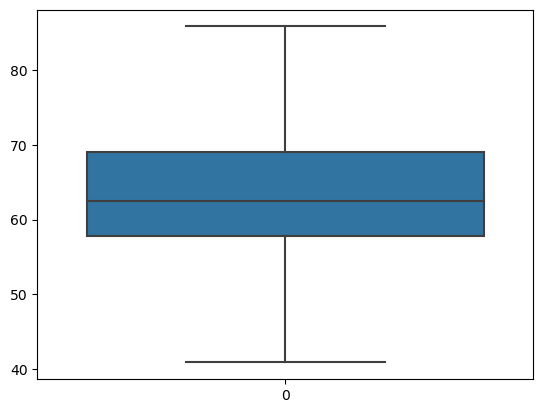

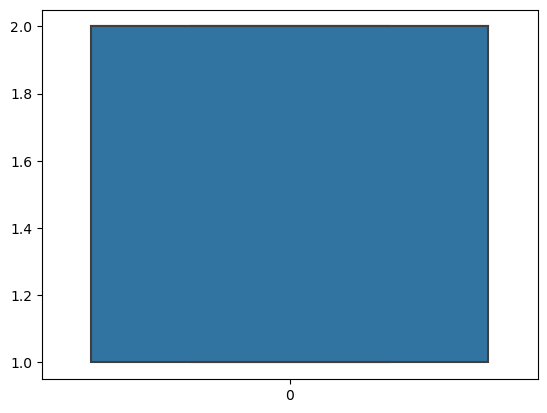

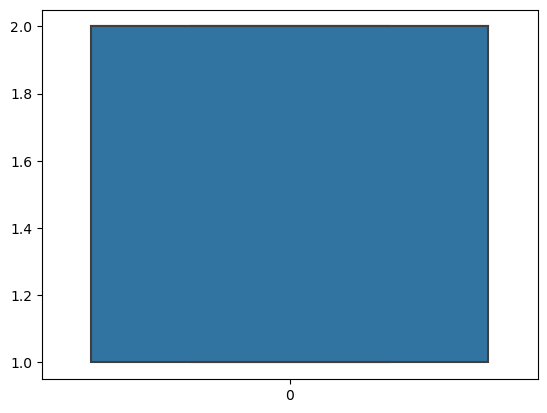

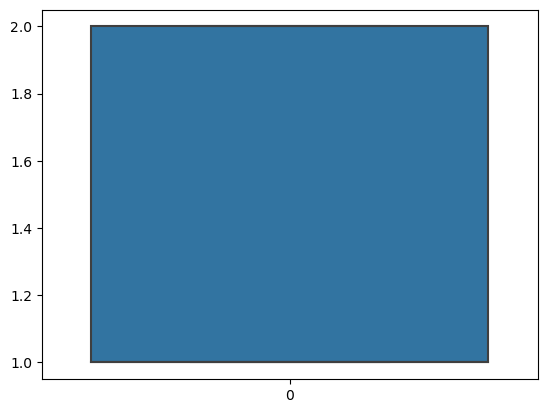

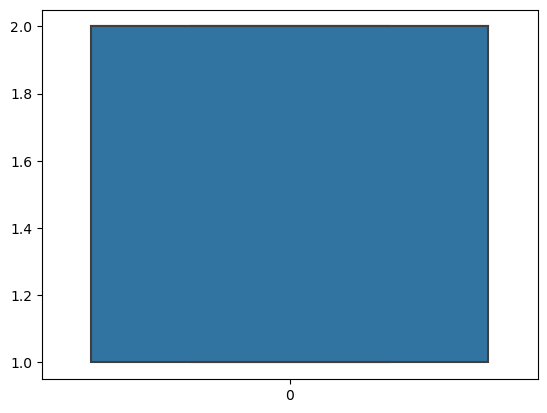

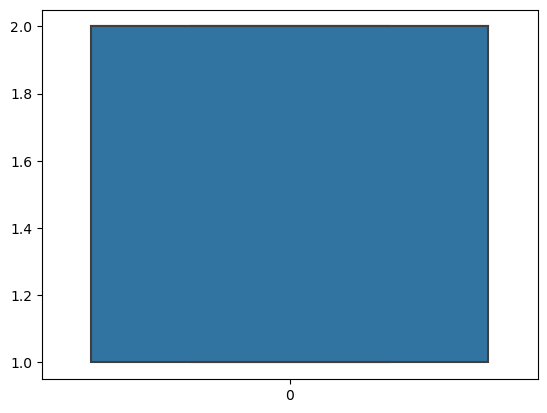

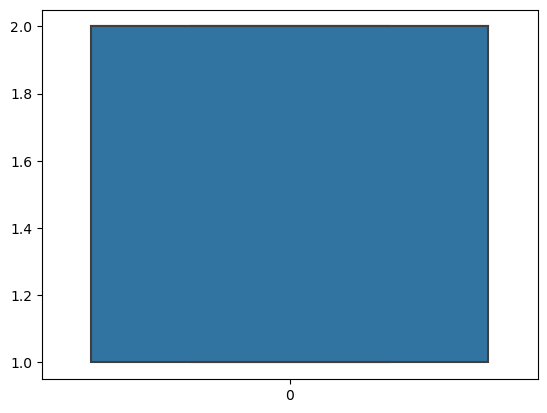

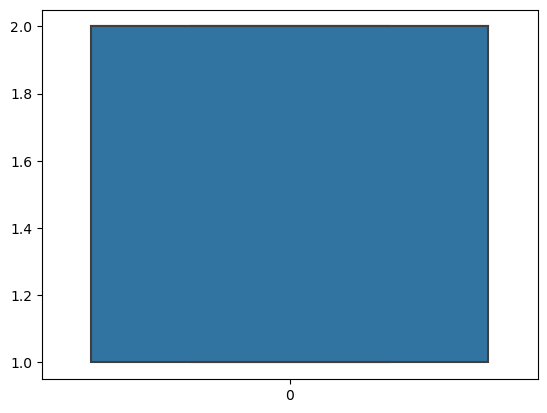

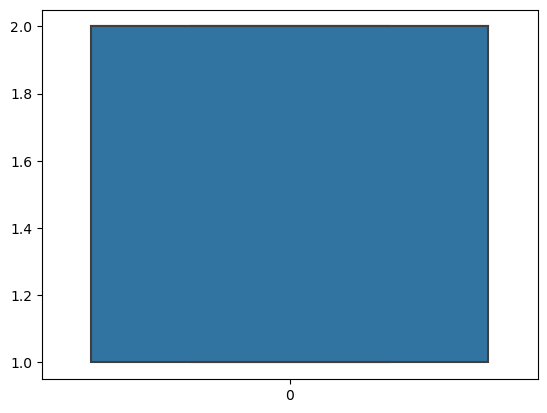

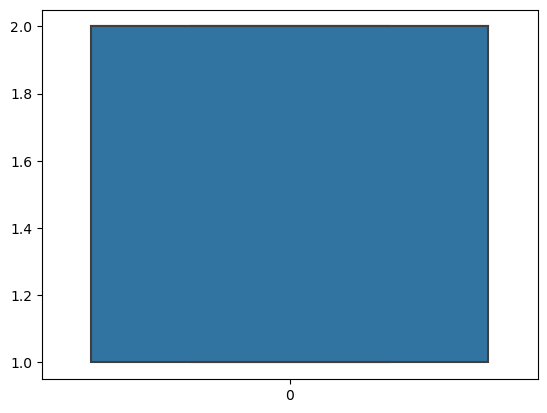

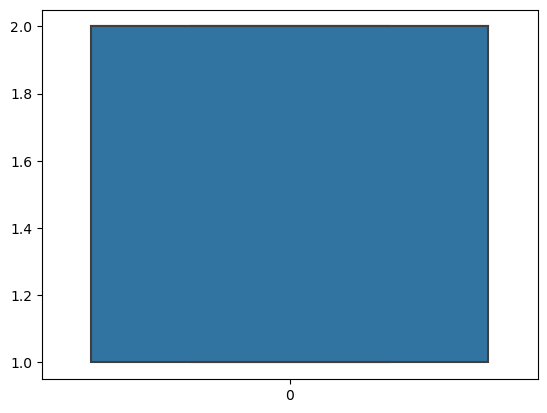

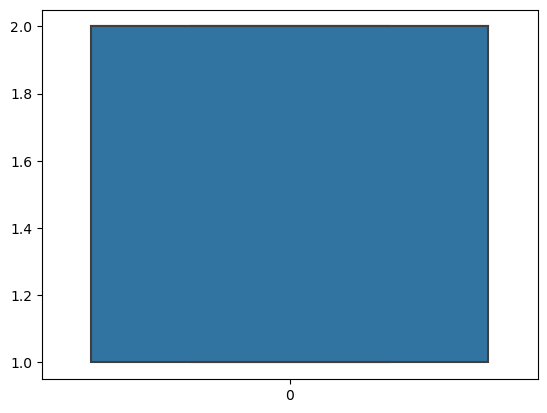

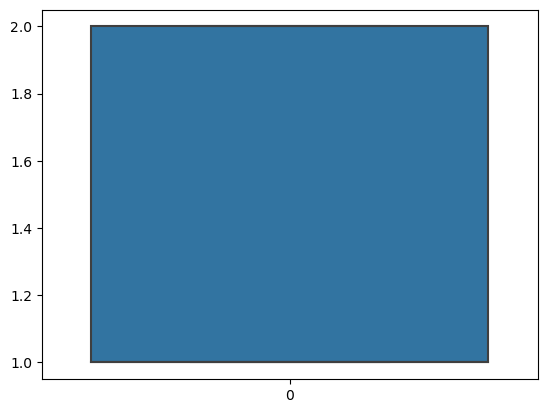

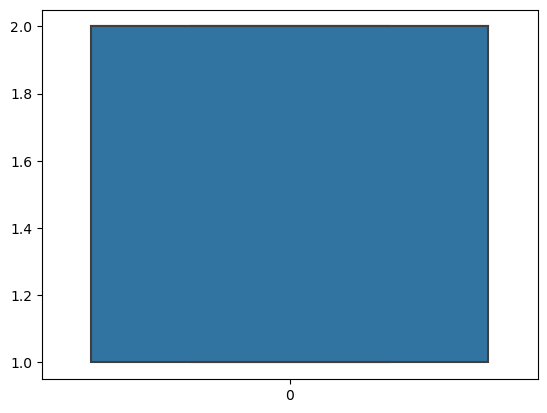

In [23]:
for i in ['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']:
    sns.boxplot(dataset[i])
    plt.show()

<Axes: >

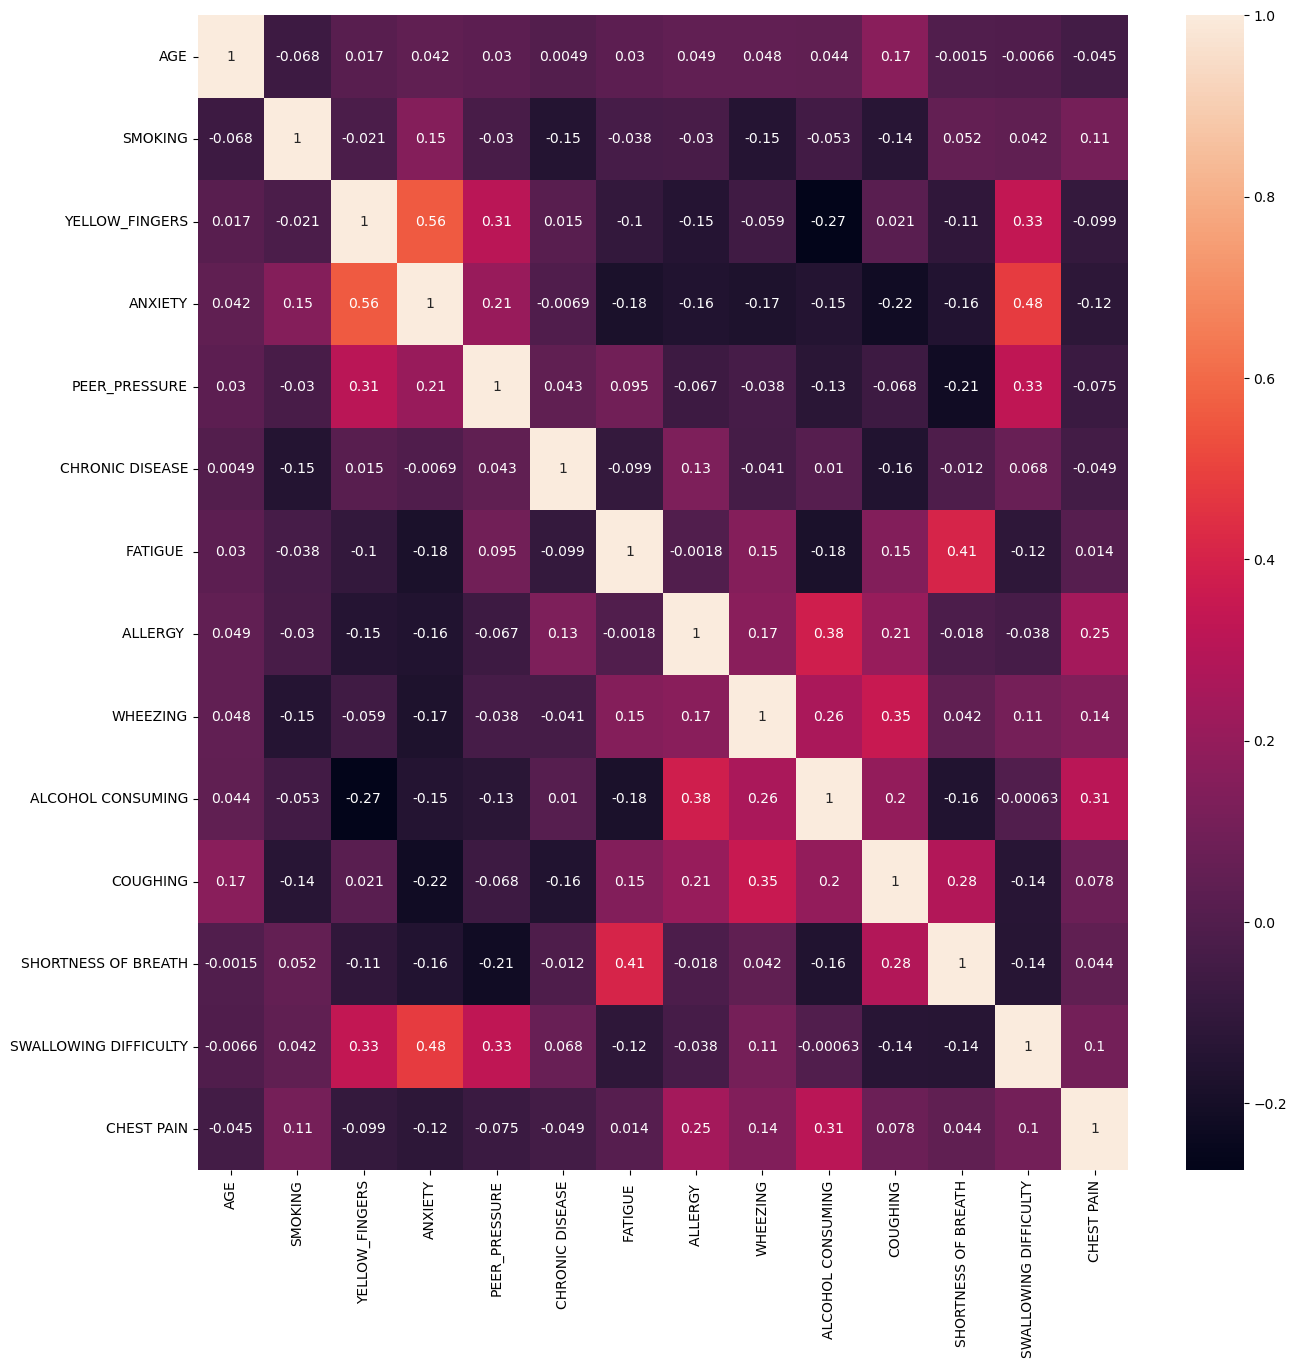

In [36]:
#third method for Relation between Target vertor and Features matrix using correlation heatmap 
s=dataset.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

In [24]:
# duplicate value remove
dataset.drop_duplicates()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,YES
1,M,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,YES
2,F,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,NO
3,M,63.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,NO
4,F,63.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,YES
280,F,59.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,NO
281,M,55.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,NO
282,M,46.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NO


In [25]:
#covert feature matrix and target vector
dataset['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    238
NO      38
Name: count, dtype: int64

In [28]:
X=dataset.drop('LUNG_CANCER',axis=1)
y=dataset['LUNG_CANCER']

In [29]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,M,69.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,M,74.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0
2,F,59.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
3,M,63.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0
4,F,63.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0
280,F,59.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
281,M,55.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
282,M,46.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0


In [30]:
y

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
279    YES
280     NO
281     NO
282     NO
283    YES
Name: LUNG_CANCER, Length: 276, dtype: object

In [37]:
# splitting the data into training data & testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
X.shape,X_train.shape,X_test.shape

((276, 15), (220, 15), (56, 15))

In [44]:
# Check the data types of columns
print(X_train.dtypes)


GENDER                    object
AGE                      float64
SMOKING                  float64
YELLOW_FINGERS           float64
ANXIETY                  float64
PEER_PRESSURE            float64
CHRONIC DISEASE          float64
FATIGUE                  float64
ALLERGY                  float64
WHEEZING                 float64
ALCOHOL CONSUMING        float64
COUGHING                 float64
SHORTNESS OF BREATH      float64
SWALLOWING DIFFICULTY    float64
CHEST PAIN               float64
dtype: object


In [46]:
from sklearn.preprocessing import LabelEncoder

# Example for a 'Gender' column
label_encoder = LabelEncoder()
X_train['GENDER'] = label_encoder.fit_transform(X_train['GENDER'])
X_test['GENDER'] = label_encoder.transform(X_test['GENDER'])  # Apply same transformation to test set


In [47]:
X_train = pd.get_dummies(X_train, columns=['GENDER'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['GENDER'], drop_first=True)


In [48]:
# Align test set columns with training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [50]:
#Model Training
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)


LogisticRegression()

In [52]:
print(X_train.head())
print(X_test.head())


      AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  \
4    63.0      1.0             2.0      1.0            1.0              1.0   
108  49.0      1.0             1.0      1.0            2.0              2.0   
159  68.0      1.0             1.0      2.0            2.0              2.0   
257  64.0      2.0             1.0      1.0            1.0              1.0   
201  60.0      1.0             1.0      1.0            1.0              2.0   

     FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
4         1.0       1.0       2.0                1.0       2.0   
108       1.0       2.0       1.0                2.0       2.0   
159       1.0       1.0       1.0                2.0       1.0   
257       1.0       2.0       2.0                2.0       2.0   
201       2.0       2.0       1.0                1.0       2.0   

     SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  GENDER_1  
4                    2.0                    1.0         

In [53]:
#Model Evaluation
#Accuracy Score
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train,X_train_prediction)

In [54]:
print("Accuracy on training data=" ,training_data_accuracy)

Accuracy on training data= 0.9227272727272727


In [55]:
#accuracy on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test,X_test_prediction)

In [56]:
print("Accuracy on test data=" ,test_data_accuracy)


Accuracy on test data= 0.9285714285714286


In [61]:
#Building a Predictive System
input_data = (0,1,0,1,0,1,0,1,0,1,0,1,0,1,0)
#Change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The lungs cancer is positive')#canser
else:
    print('The lungs Cancer is negative')#not cancer


['NO']
The lungs Cancer is negative


In [65]:
import pickle
filename = "logisticdmodel.sav"
pickle.dump(model,open(filename,"wb"))


In [66]:
load_model = pickle.load(open(filename,'rb'))

In [67]:
load_model.predict([[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]])

array(['NO'], dtype=object)

In [69]:
import joblib 
joblib.dump(model,'lung_logistic.pkl')

print("Model training complete and saved as 'lung_logistic.pkl'.")

Model training complete and saved as 'lung_logistic.pkl'.
